In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data for each years with a chunksize because the data is too big to fit in the RAM

In [2]:
df_2015 = pd.read_json("DATA\quotes-2015.json-004.bz2", compression="bz2", chunksize=1000000, lines=True, encoding='UTF-8')
df_2016 = pd.read_json("DATA\quotes-2016.json-002.bz2", compression="bz2", chunksize=1000000, lines=True, encoding='UTF-8')
df_2017 = pd.read_json("DATA\quotes-2017.json-005.bz2", compression="bz2", chunksize=1000000, lines=True, encoding='UTF-8')
df_2018 = pd.read_json("DATA\quotes-2018.json-006.bz2", compression="bz2", chunksize=1000000, lines=True, encoding='UTF-8')
df_2019 = pd.read_json("DATA\quotes-2019.json-003.bz2", compression="bz2", chunksize=1000000, lines=True, encoding='UTF-8')

### Get the most popular speakers
We get the most popular speaker by suming the number of occurrences quotations for each speaker and then sort them in descending order. Indeed if a speaker is more often cited, it means that he is more popular.  
Here we use only a sample of the data (the first batch) !

In [3]:
#a.groupby(a['speaker']).quotation.count().sort_values(ascending=False).head(10)
top15_popular_2015 = next(df_2015).groupby('speaker').numOccurrences.sum().sort_values(ascending=False).head(15)
top15_popular_2016 = next(df_2016).groupby('speaker').numOccurrences.sum().sort_values(ascending=False).head(15)
top15_popular_2017 = next(df_2017).groupby('speaker').numOccurrences.sum().sort_values(ascending=False).head(15)
top15_popular_2018 = next(df_2018).groupby('speaker').numOccurrences.sum().sort_values(ascending=False).head(15)
top15_popular_2019 = next(df_2019).groupby('speaker').numOccurrences.sum().sort_values(ascending=False).head(15)

### Top 15 most popular speakers for each years

In [9]:
print(top15_popular_2015)
print(top15_popular_2016)
print(top15_popular_2017)
print(top15_popular_2018)
print(top15_popular_2019)

speaker
None                      1473345
Mark-Paul Gosselaar         25627
Donald Trump                20767
President Barack Obama      19340
Pope Francis                13398
Jeb Bush                     7066
Hillary Clinton              6976
Josh Earnest                 6125
President Obama              5830
John Kerry                   5770
Angela Merkel                5532
Bill Cosby                   5284
Tony Abbott                  4707
Narendra Modi                4622
Benjamin Netanyahu           4442
Name: numOccurrences, dtype: int64
speaker
None                      1425169
Donald Trump                95801
Hillary Clinton             28929
President Barack Obama      20693
John Mackey ,               11035
Bernie Sanders               9414
Malcolm Turnbull             7153
Ted Cruz                     6842
John Kerry                   6527
Pope Francis                 6120
Mike Pence                   5472
President Obama              5172
Boris Johnson                48

In [24]:
donald_trump_pop_2015 = top15_popular_2015[top15_popular_2015.index == 'Donald Trump'].values
donald_trump_pop_2016 = top15_popular_2016[top15_popular_2016.index == 'Donald Trump'].values
donald_trump_pop_2017 = top15_popular_2017[top15_popular_2017.index == 'President Donald Trump'].values
donald_trump_pop_2018 = top15_popular_2018[top15_popular_2018.index == 'President Donald Trump'].values
donald_trump_pop_2019 = top15_popular_2019[top15_popular_2019.index == 'President Donald Trump'].values

donald_trump_pop_years = []
donald_trump_pop_years.append(donald_trump_pop_2015.item())
donald_trump_pop_years.append(donald_trump_pop_2016.item())
donald_trump_pop_years.append(donald_trump_pop_2017.item())
donald_trump_pop_years.append(donald_trump_pop_2018.item())
donald_trump_pop_years.append(donald_trump_pop_2019.item())
donald_trump_pop_years

[20767, 95801, 118986, 111513, 54003]

In [25]:
years = [2015, 2016, 2017, 2018, 2019]

## Donald Trump popularity from 2015 to 2019

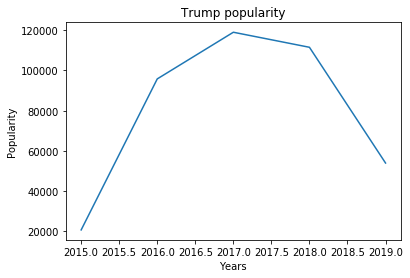

In [39]:
fig, ax = plt.subplots()
ax.plot(years, donald_trump_pop_years)
ax.set(xlabel='Years', ylabel='Popularity', title='Trump popularity')
plt.show()

### Example of how we can apply the most popular speaker on all the data and not only on a batch

In [ ]:
chunk_list = []
for batch in df:
    more_popular = batch.groupby(batch['speaker']).numOccurrences.sum().sort_values(ascending=False).head(15)
    chunk_list.append(more_popular)
df_concat = pd.concat(chunk_list)
df_concat.groupby(['speaker']).sum().sort_values(ascending=False)

In [51]:
wikidata = pd.read_csv('DATA/wikidata_labels_descriptions.csv.bz2', compression='bz2', index_col='QID', chunksize=1000000)

### Get the QIDs associated to Donald Trump from wikidata

In [72]:
QID_trump_list = []
for batch in wikidata:
    QID_trump = batch[(batch.index == 'Q22686') | (batch.index == 'Q27947481')]
    if len(QID_trump.values) != 0:
        QID_trump_list.append(QID_trump)

In [74]:
QID_trump_list

[               Label                          Description
 QID                                                      
 Q22686  Donald Trump  45th president of the United States,
                   Label         Description
 QID                                        
 Q27947481  Donald Trump  American physician]

In [42]:
batch_2015 = next(df_2015)

In [88]:
QIDs_Trump = batch_2015[batch_2015['speaker'] == 'Donald Trump']['qids'].head(1).values.item()
QIDs_Trump

['Q22686', 'Q27947481']

In [93]:
presidents = batch_2015[batch_2015['speaker'].str.contains('President')]

In [94]:
presidents['speaker'].unique()

array(['President Obama', 'President Barack Obama', 'President Bush',
       'President George W. Bush', 'President Bill Clinton',
       'President Jimmy Carter', 'President Clinton',
       'President Donald Trump', 'President Mahama',
       'President George H. W. Bush', 'President Trump',
       'President Carter', 'President Maduro',
       'President George H.W. Bush', 'Kid President', 'President Monson'],
      dtype=object)